- **@author**: run_walker
- **@references**:
    1. [mlxtend > Heatmap](http://rasbt.github.io/mlxtend/user_guide/plotting/heatmap/)

- `mlxtend.plotting.heatmap`: A simple function that creates nice-looking heatmaps from NumPy arrays using matplotlib and the Viridis color palette by default.
- `seaborn.heatmap`:
- 自己实现

In [12]:
from mlxtend.plotting import heatmap

?heatmap

Signature:
heatmap(
    matrix,
    hide_spines=False,
    hide_ticks=False,
    figsize=None,
    cmap=None,
    colorbar=True,
    row_names=None,
    column_names=None,
    column_name_rotation=45,
    cell_fmt='.2f',
    cell_font_size=None,
)
Docstring:
Plot a heatmap via matplotlib.

Parameters
-----------
conf_mat : array-like, shape = [n_rows, n_columns]
    And arbitrary 2D array.

hide_spines : bool (default: False)
    Hides axis spines if True.

hide_ticks : bool (default: False)
    Hides axis ticks if True

figsize : tuple (default: (2.5, 2.5))
    Height and width of the figure

cmap : matplotlib colormap (default: `None`)
    Uses matplotlib.pyplot.cm.viridis if `None`

colorbar : bool (default: True)
    Shows a colorbar if True

row_names : array-like, shape = [n_rows] (default: None)
    List of row names to be used as y-axis tick labels.

column_names : array-like, shape = [n_columns] (default: None)
    List of column names to be used as x-axis tick labels.

column

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def corr_heatmap(corr_matrix=None, data_df=None, corr_method='pearson', figsize=None,
                 mask=None, show_corr=True, corr_format='.1f', cbar_kws=None):
    """
    绘制相关系数矩阵的热力图

    Parameters
    ----------
    corr_matrix :
    data_df :
    corr_method :
    figsize :
    mask :
        'upper': 或者'u'
        'lower': 或者'l'
        None:
    show_corr : 是否在热力图上显示相关系数的数值
    corr_format : 显示数值的格式
    cbar_kws: 传给函数`sns.heatmap`，例如传入`{"shrink": 0.5}`控制缩放颜色条

    Returns
    -------

    """
    if corr_matrix is None:
        corr_matrix = data_df.corr(method=corr_method)

    # Create a mask to hide the upper or lower triangle of the correlation matrix (which is symmetric)
    if mask in {'upper', 'u'}:
        mask = np.zeros_like(corr_matrix, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    elif mask in {'lower', 'l'}:
        mask = np.zeros_like(corr_matrix, dtype=np.bool)
        mask[np.tril_indices_from(mask)] = True
    if figsize is not None:
        plt.figure(figsize=figsize);
    if cbar_kws is None:
        cbar_kws = {}
    sns.heatmap(corr_matrix,
                mask=mask,  # 蒙板，值为True的地方不显示
                center=0,  # 调整颜色和数值的对应
                annot=show_corr, fmt=corr_format,
                square=True, linewidth=.5,
                cbar_kws=cbar_kws  
                );

# Example1 Simple heatmap
相比较之下，`mlxtend`中的实现风格更优美。

In [10]:
import numpy as np
from mlxtend.plotting import heatmap

np.random.seed(123)
arr = np.random.random((20, 30))

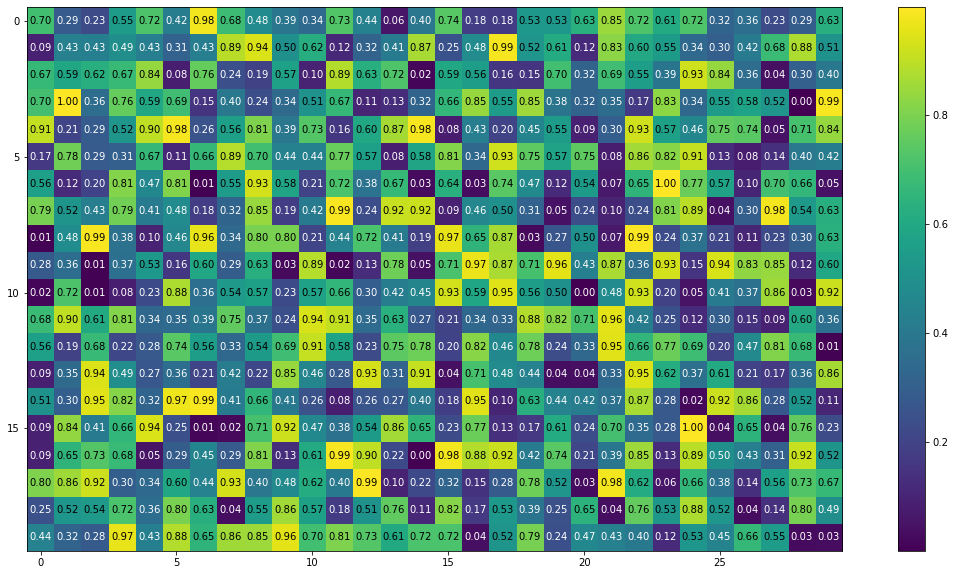

In [11]:
heatmap(arr, figsize=(20, 10));

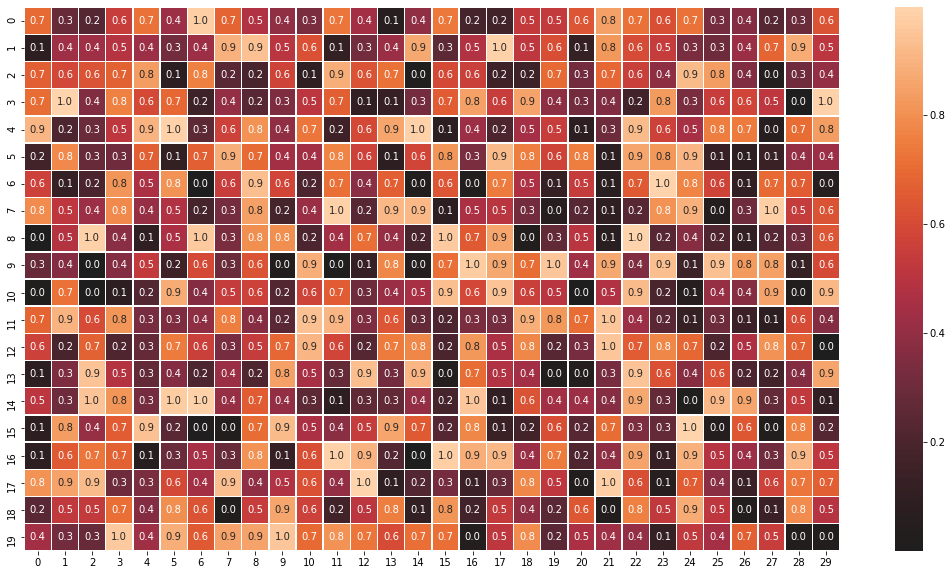

In [17]:
corr_heatmap(arr, figsize=(20, 10))

# Example2 Covariance matrix as heatmap
尽管仍然是`mlxtend`中的实现风格更为优美，但借助`seaborn`中的实现，可以实现选择蒙板，只显示局部以减少重复信息。

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


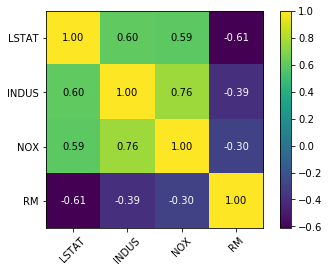

In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap

cols = ['LSTAT', 'INDUS', 'NOX', 'RM']
cm = np.corrcoef(df[cols].values.T)
heatmap(cm, column_names=cols, row_names=cols);

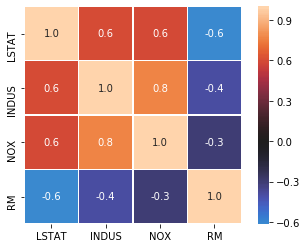

In [22]:
corr_heatmap(data_df=df[cols])

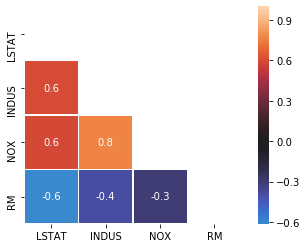

In [21]:
corr_heatmap(data_df=df[cols], mask='upper')